# Protein Folding in 2D 
Proteins are long strands of amino acids that control many important processes in the human body. It is known that proteins are stored 'folded' inside the cells of the body, and that the specific folding significantly influences their functioning. ‘Misfolded’ proteins can play a role in cancer, Alzheimer's disease and cystic fibrosis.

Due to the complexity of the protein folding problem, simplified models such as Dill's hydrophobic-polar (HP) model have become one of the major tools for studying protein structure. The HP model is based on the observation that the hydrophobic force is the main force deter- mining the unique native conformation (and hence the functional state) of small globular proteins.

In a protein, hydrophobic amino acids (H) like to lie 'adjecntly', polar amino acids (P) do not have that preference. When two hydrophobic amino acids lie next to each other, an 'H- bond' is formed due to the attractive forces between the two. And the more bonds, the more stable the protein. The HP-model, containing of just two types of amino acids, arranges these in a grid or a lattice.

![Example Screenshot](8_piece_protein.png)


In [9]:
import numpy as np 
import pandas as pd

## Basic Algorithm for Protein Folding
This thread covers the development of an algorithm to simulate and analyze protein folding using a simplified model known as the HP model. The HP model involves two types of amino acids: hydrophobic (H) and polar (P). The goal is to arrange these amino acids on a 2D grid or lattice to create stable protein configurations.

The key steps of the algorithm include:

1. **Initializing Acids**: A function called `random_division` is used to divide a specified number of amino acids into hydrophobic and polar types while ensuring at least one of each type. 
- **Initializing Grid**: The `initialize grid` function begins by initializing a 2D grid or lattice with a specified size. Hydrophobic and polar amino acids are randomly placed on the grid.
- **Calculate Energy**: The function `calculate_hbonds` calculates the initial energy of a given grid by counting the number of adjacent hydrophobic amino acids (H-bonds).

- **Fold Proteins**: The function `reshape_grid` attempts to reshape a given grid to improve stability. It iterates through various configurations to optimize the placement of amino acids and maximizes the energy function.

- **Creating Samples**: The `generate_random_samples` function generates a given number of random samples for various amino acid lengths. It uses the random division to determine the amino acid types and grid size and then initializes grids accordingly.

- **Generating and storing Results**: The code generates random samples for different amino acid lengths (5, 10, 15, 20, 25, 30, 35, and 40) and calculates various metrics for each sample. It then prints the sample information, grid configuration, and metrics.


### Step 1 - Initializing Acids

This function `random_division` takes the total number of amino acids as input and randomly divides them into hydrophobic and polar amino acids, before creating a random 1D amino acid string. It ensures that there's at least one hydrophobic and one polar amino acid. You can adjust the total_amino_acids variable to the desired number of amino acids you want to divide.

In [145]:
total_amino_acids = 10  # Change this to a desired number, 10 is used for illustration purposes

def random_division(total_amino_acids):
    num_hydrophobic = np.random.randint(1, total_amino_acids)  # Ensure at least one H and P
    num_polar = total_amino_acids - num_hydrophobic
    # randomly shuffle the amino acids
    amino_acids = ['H'] * num_hydrophobic + ['P'] * num_polar
    np.random.shuffle(amino_acids)
    return num_hydrophobic, num_polar, amino_acids

num_hydrophobic, num_polar, amino_acids = random_division(total_amino_acids)
print("Number of Hydro acids:", num_hydrophobic)
print("Number of Polar acids:", num_polar)
print("Random Amino Acid String:", "".join(amino_acids))

Number of Hydro acids: 7
Number of Polar acids: 3
Random Amino Acid String: PHHHHHHHPP


### Step 2 - Initializing Grid
The `initialize_grid` function generates a grid to place amino acids, with specified dimensions, and populates it with H and P amino acids, while ensuring they do not overlap and tracks their placement order. This allows for simulating the random arrangement of amino acids on a grid for various applications.

In [146]:
amino_acids_copy = amino_acids.copy()

def initialize_grid(amino_acids, num_hydrophobic, num_polar):
    amino_acids_copy = amino_acids.copy()
    grid_size = num_hydrophobic + num_polar
    total_amino_acids = len(amino_acids)
    grid = np.full((grid_size, grid_size), fill_value='', dtype=object)  
    amino_acid_order = []  # List to track the order of amino acids placed
    
    # Place the first amino acid randomly on the grid
    first_amino_row = np.random.randint(grid_size)
    first_amino_col = np.random.randint(grid_size)
    amino_acid_type = amino_acids_copy.pop(0)
    grid[first_amino_row, first_amino_col] = amino_acid_type
    
    # Keep track of order
    amino_acid_order.append((amino_acid_type, (first_amino_row, first_amino_col)))
    total_amino_acids -= 1
    
    # Place the remaining amino acids next to the last placed amino acid
    while total_amino_acids > 0:
        last_amino_row, last_amino_col = amino_acid_order[-1][1]
        neighbors = [
            (last_amino_row - 1, last_amino_col),
            (last_amino_row + 1, last_amino_col),
            (last_amino_row, last_amino_col - 1),
            (last_amino_row, last_amino_col + 1)
        ]
        
        valid_neighbors = [(row, col) for row, col in neighbors if 0 <= row < grid_size and 0 <= col < grid_size and grid[row, col] == '']
        
        if valid_neighbors and amino_acids_copy:  # Check if there are valid neighbors and remaining amino acids
            # Shuffle the list of valid neighbors and choose one randomly
            np.random.shuffle(valid_neighbors)
            chosen_row, chosen_col = valid_neighbors[0]
            amino_acid_type = amino_acids_copy.pop(0)
            grid[chosen_row, chosen_col] = amino_acid_type
            amino_acid_order.append((amino_acid_type, (chosen_row, chosen_col)))
            total_amino_acids -= 1
        else:
            break  # No valid neighbors or no remaining amino acids, exit the loop
    
    return grid, amino_acid_order

# Example usage
initial_grid, amino_acid_order = initialize_grid( amino_acids_copy, num_hydrophobic, num_polar)


In [147]:
print("Grid size:", len(initial_grid[0]), 'x', len(initial_grid[0]))
print(initial_grid)


Grid size: 10 x 10
[['' '' '' '' '' '' '' 'H' 'H' 'H']
 ['' '' '' '' '' '' '' 'P' 'H' 'H']
 ['' '' '' '' '' '' '' '' 'H' '']
 ['' '' '' '' '' '' 'P' 'P' 'H' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '']]


In [148]:
print("Amino Acid Order:", amino_acid_order)

Amino Acid Order: [('P', (1, 7)), ('H', (0, 7)), ('H', (0, 8)), ('H', (0, 9)), ('H', (1, 9)), ('H', (1, 8)), ('H', (2, 8)), ('H', (3, 8)), ('P', (3, 7)), ('P', (3, 6))]


### Step 3a - Calculate H-bonds
The `find_H_combinations_grid` function is used to~ identify and collect sets of coordinates representing adjacent 'H' amino acids in a grid. It iterates through the entire grid, checking each position for the presence of 'H' amino acids. If an 'H' amino acid is found, it examines neighboring positions (up, down, left, right) to identify adjacent 'H' amino acids. For each pair of adjacent 'H' amino acids, it creates a frozenset containing their coordinates (ensuring that the order of coordinates doesn't matter) and adds this frozenset to a set. This set stores all unique pairs of adjacent 'H' amino acids found in the grid. The function returns this set of adjacent 'H' amino acid pairs.

In [149]:
def find_H_pairs_grid(grid):
    adjacent_hydrophobic_amino_acids = set()  # Use a set to automatically remove duplicates

    # Iterate through the grid to find adjacent 'H' amino acids
    for row in range(grid.shape[0]):
        for col in range(grid.shape[1]):
            current_acid = grid[row, col]

            # Check if the current amino acid is 'H'
            if current_acid == 'H':
                # Check the neighboring positions (up, down, left, right) relative to the current position
                neighbors = [
                    (row - 1, col),
                    (row + 1, col),
                    (row, col - 1),
                    (row, col + 1)
                ]

                for neighbor_row, neighbor_col in neighbors:
                    # Check if the neighbor is within the grid bounds
                    if 0 <= neighbor_row < grid.shape[0] and 0 <= neighbor_col < grid.shape[1]:
                        neighbor_acid = grid[neighbor_row, neighbor_col]

                        # Check if the neighbor is also 'H'
                        if neighbor_acid == 'H':
                            # Use frozenset to ensure that the order of coordinates doesn't matter
                            amino_acid_pair = frozenset({(row, col), (neighbor_row, neighbor_col)})
                            adjacent_hydrophobic_amino_acids.add(amino_acid_pair)
                            
    return adjacent_hydrophobic_amino_acids

find_H_pairs_grid(initial_grid)

{frozenset({(2, 8), (3, 8)}),
 frozenset({(1, 8), (2, 8)}),
 frozenset({(0, 8), (0, 9)}),
 frozenset({(0, 9), (1, 9)}),
 frozenset({(1, 8), (1, 9)}),
 frozenset({(0, 8), (1, 8)}),
 frozenset({(0, 7), (0, 8)})}

### Step 3b - Calculate H-bonds
The `find_H_combinations_order` function examines the order of amino acids and identifies adjacent 'H' amino acids. It does this by iterating through the amino acid order, checking pairs of consecutive amino acids for 'H' type, and recording these pairs as frozensets in a set to remove duplicates. This function helps identify adjacent 'H' amino acids in the sequence order, which is useful for analyzing the arrangement of amino acids.

In [150]:
def find_H_pairs_order(amino_acid_order):
    adjacent_hydrophobic_amino_acids = set()  # Use a set to automatically remove duplicates

    # Iterate through the amino acid order to find adjacent 'H' amino acids
    for i in range(len(amino_acid_order) - 1):
        current_acid, current_position = amino_acid_order[i]
        next_acid, next_position = amino_acid_order[i + 1]

        # Check if both current and next amino acids are 'H'
        if current_acid == 'H' and next_acid == 'H':
            # Use frozenset to ensure that the order of positions doesn't matter
            amino_acid_pair = frozenset({current_position, next_position})
            adjacent_hydrophobic_amino_acids.add(amino_acid_pair)

    return adjacent_hydrophobic_amino_acids

find_H_pairs_order(amino_acid_order)

{frozenset({(2, 8), (3, 8)}),
 frozenset({(1, 8), (2, 8)}),
 frozenset({(0, 8), (0, 9)}),
 frozenset({(0, 9), (1, 9)}),
 frozenset({(1, 8), (1, 9)}),
 frozenset({(0, 7), (0, 8)})}

### Step 3c - Calculate H-bonds
The provided code calculates the H-combinations in two different ways and then compares them. It calculates the H-pairs in the grid using the `find_H_combinations_grid` function and the H-pairs in the amino acid order using the `find_H_combination_order` function. Then, it subtracts the H-combinations found in the amino acid order from those found in the grid. This comparison helps identify the **H-bonds** that are formed between adjacent 'H' amino acids in the grid but not in the given amino acid sequence order.

In [151]:
def find_H_bonds(grid, amino_acid_order):
    grid_h_pairs = find_H_pairs_grid(grid)
    order_h_pairs = find_H_pairs_order(amino_acid_order)
    return grid_h_pairs - order_h_pairs

H_bonds = find_H_bonds(initial_grid, amino_acid_order)

In [152]:
print('Number of H-bonds:', len(H_bonds))

for bond in H_bonds:
    coordinates = [coord for coord in bond]
    print(coordinates)

Number of H-bonds: 1
[(0, 8), (1, 8)]


### Step 3 - Fold Proteins
Now we implement an Ant Colony Optimization (ACO) algorithm to optimize the folding of amino acids on a grid to maximize H-bonds. It initializes the grid with random amino acid placements, and ants iteratively move amino acids on the grid while considering pheromone levels and a heuristic function based on the H-bond score. The pheromone levels are updated based on the best placement found by ants. Finally, the best placement and H-bonds score are printed.

In [153]:
initial_grid

array([['', '', '', '', '', '', '', 'H', 'H', 'H'],
       ['', '', '', '', '', '', '', 'P', 'H', 'H'],
       ['', '', '', '', '', '', '', '', 'H', ''],
       ['', '', '', '', '', '', 'P', 'P', 'H', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '', '', '']], dtype=object)

### Step 4 - Creating Samples
The code generates N random protein grid configurations with a specified number of hydrophobic and polar amino acids using the `generate_random_samples` function. 

In [154]:
def generate_random_samples(N, total_amino_acids):
    random_samples = []

    for _ in range(N):
        num_hydrophobic, num_polar, amino_acids = random_division(total_amino_acids)
        amino_acids_copy = amino_acids.copy()
        initial_grid, amino_acid_order = initialize_grid(amino_acids_copy, num_hydrophobic, num_polar)
        hbonds = len(find_H_bonds(initial_grid, amino_acid_order))
        
        random_samples.append((num_hydrophobic,
                               num_polar,
                               amino_acids,
                               initial_grid,
                               amino_acid_order,
                               hbonds))

    return random_samples


generate_random_samples(3, total_amino_acids)

[(1,
  9,
  ['P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
  array([['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['P', 'P', 'P', 'P', '', '', '', '', '', ''],
         ['H', 'P', 'P', 'P', '', '', '', '', '', ''],
         ['P', 'P', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', '']], dtype=object),
  [('P', (2, 0)),
   ('H', (3, 0)),
   ('P', (4, 0)),
   ('P', (4, 1)),
   ('P', (3, 1)),
   ('P', (2, 1)),
   ('P', (2, 2)),
   ('P', (2, 3)),
   ('P', (3, 3)),
   ('P', (3, 2))],
  0),
 (7,
  3,
  ['H', 'H', 'P', 'H', 'P', 'P', 'H', 'H', 'H', 'H'],
  array([['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', ''],
         ['', '', '', '', '', '', '', '', '', '

In [162]:
def store_samples_in_dataframe(num_samples, amino_acid_lengths):
    
    data = {
        "Amino Acid Length": [],
        "Num Hydrophobic": [],
        "Num Polar": [],
        "Amino Acids": [],
        "Initial Grid": [],
        "Amino Acid Order": [],
        "H-Bonds": []
    }

    for length in amino_acid_lengths:
        random_samples = generate_random_samples(num_samples, length)
        for sample in random_samples:
            num_hydrophobic, num_polar, amino_acids, initial_grid, amino_acid_order, hbonds = sample
            data["Amino Acid Length"].append(length)
            data["Num Hydrophobic"].append(num_hydrophobic)
            data["Num Polar"].append(num_polar)
            data["Amino Acids"].append(amino_acids)
            data["Initial Grid"].append(initial_grid)
            data["Amino Acid Order"].append(amino_acid_order)
            data["H-Bonds"].append(hbonds)

    df = pd.DataFrame(data)
    return df

# Example usage
num_samples = 100
amino_acid_lengths = [20, 25, 30, 35, 40]
df = store_samples_in_dataframe(num_samples, amino_acid_lengths)
df

,Amino Acid Length,Num Hydrophobic,Num Polar,Amino Acids,Initial Grid,Amino Acid Order,H-Bonds
0,20,9,11,"[P, H, P, H, H, P, P, P, P, H, P, P, H, H, P, ...","[[, , , , , , , , , , , , , , , , , , , ], [, ...","[(P, (18, 12)), (H, (19, 12)), (P, (19, 11)), ...",0
1,20,8,12,"[P, H, H, H, P, H, P, P, P, H, P, P, P, H, P, ...","[[, , , , , , , , , , , , , , , , , , , ], [, ...","[(P, (17, 2)), (H, (17, 3)), (H, (18, 3)), (H,...",0
2,20,3,17,"[P, H, P, P, P, H, P, P, P, H, P, P, P, P, P, ...","[[, , , , , , , , , , , , , , , , , , , ], [, ...","[(P, (5, 12)), (H, (6, 12)), (P, (6, 13)), (P,...",0
3,20,12,8,"[H, H, H, H, P, H, H, H, H, P, P, H, P, P, P, ...","[[, , , , , , , , , , , , , , , , , , , ], [, ...","[(H, (17, 12)), (H, (18, 12)), (H, (19, 12)), ...",3
4,20,17,3,"[H, H, H, P, P, H, H, H, P, H, H, H, H, H, H, ...","[[, , , , , , , , , , , , , , , , , , , ], [, ...","[(H, (9, 4)), (H, (9, 3)), (H, (8, 3)), (P, (8...",3
...,...,...,...,...,...,...,...
495,40,30,10,"[H, H, H, P, H, H, P, P, P, H, H, H, H, P, H, ...","[[, , , , , , , , , , , , , , , , , , , , , , ...","[(H, (2, 0)), (H, (3, 0)), (H, (4, 0)), (P, (5...",9
496,40,10,30,"[H, P, P, P, P, P, P, H, P, P, P, P, P, H, P, ...","[[, , , , , , , , , , , , , , , , , , , , , , ...","[(H, (39, 19)), (P, (39, 20)), (P, (39, 21)), ...",0
497,40,12,28,"[H, P, H, P, H, P, P, P, H, P, P, P, P, H, P, ...","[[, , , , , , , , , , , , , , , , , , , , , , ...","[(H, (31, 24)), (P, (32, 24)), (H, (32, 23)), ...",0
498,40,35,5,"[H, H, H, H, H, H, H, H, H, H, H, P, H, H, P, ...","[[, , , , , , , , , , , , , , , , , , , , , , ...","[(H, (18, 25)), (H, (19, 25)), (H, (19, 26)), ...",12


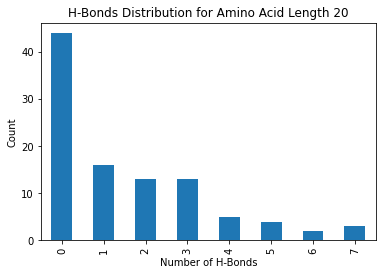

In [190]:
import matplotlib.pyplot as plt

def descriptives(df, amino_acid_lengths):
    # Create a dictionary to store the plots for each amino acid length
    plots = {}
    
    for acid_length in amino_acid_lengths:
        # Filter the DataFrame for the specific amino acid length
        filtered_df = df[df['Amino Acid Length'] == acid_length]
        
        # Check if the filtered DataFrame is empty
        if not filtered_df.empty:
            # Group and count data, then create a bar plot
            data = filtered_df.groupby(['H-Bonds'])['Amino Acid Length'].count()
            plot = data.plot(kind='bar')
            
            # Store the plot in the dictionary with the amino acid length as the key
            plots[acid_length] = plot
        
    return plots

# Example usage
amino_acid_lengths = [5, 10, 15, 20]  # Define the sequence of lengths you want to analyze
plots = descriptives(df, amino_acid_lengths)

# Show or save the plots as needed
for acid_length, plot in plots.items():
    plt.title(f'H-Bonds Distribution for Amino Acid Length {acid_length}')
    plt.xlabel('Number of H-Bonds')
    plt.ylabel('Count')
    plt.show()  # Show the plot
    # Alternatively, save the plot to a file
    # plt.savefig(f'plot_{acid_length}.png')
